# Exercise 32

#### Bayes classifier from HW7

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.io import loadmat

# Load data
data = loadmat("HW8.mat")
train_x = data["train_x"]
train_y = data["train_y"].flatten()
test_x = data["test_x"]
test_y = data["test_y"].flatten()

# (i) Estimate parameters
def estimate_parameters(train_x, train_y, class_label):
    class_data = train_x[train_y == class_label]
    n_class = len(class_data)
    mu = np.mean(class_data, axis=0)
    sigma = np.cov(class_data, rowvar=False)
    return mu, sigma, n_class

# Estimate for both classes
mu1, sigma1, n1 = estimate_parameters(train_x, train_y, class_label=1)
mu2, sigma2, n2 = estimate_parameters(train_x, train_y, class_label=2)

# Priors
P_w1 = n1 / len(train_y)
P_w2 = n2 / len(train_y)

# (ii) Classify test data
Btest_y = []
for x in test_x:
    # Compute likelihoods
    p_x_given_w1 = multivariate_normal.pdf(x, mean=mu1, cov=sigma1)
    p_x_given_w2 = multivariate_normal.pdf(x, mean=mu2, cov=sigma2)
    
    # Compute posteriors
    post_w1 = P_w1 * p_x_given_w1
    post_w2 = P_w2 * p_x_given_w2
    
    # Assign to the class with the highest posterior
    Btest_y.append(1 if post_w1 > post_w2 else 2)

Btest_y = np.array(Btest_y)

# (iii) Estimate error classification probability
correct_predictions = np.sum(Btest_y == test_y)
error_rate = 1 - (correct_predictions / len(test_y))

# Print results
print(f"Bayes Classifier Results :")
print(f"Class Priors: P(w1) = {P_w1:.3f}, P(w2) = {P_w2:.3f}")
print(f"Means: mu1 = {mu1}, mu2 = {mu2}")
print(f"Covariances: sigma1 =\n{sigma1}\n, sigma2 =\n{sigma2}")
print(f"Classification Error Rate: {error_rate:.3f}")


Bayes Classifier Results :
Class Priors: P(w1) = 0.500, P(w2) = 0.500
Means: mu1 = [0.14549472 0.11840199], mu2 = [ 2.07024339 -1.89136529]
Covariances: sigma1 =
[[3.63737014 1.74128017]
 [1.74128017 4.22056748]]
, sigma2 =
[[4.71777486 2.6006903 ]
 [2.6006903  4.37763924]]
Classification Error Rate: 0.150


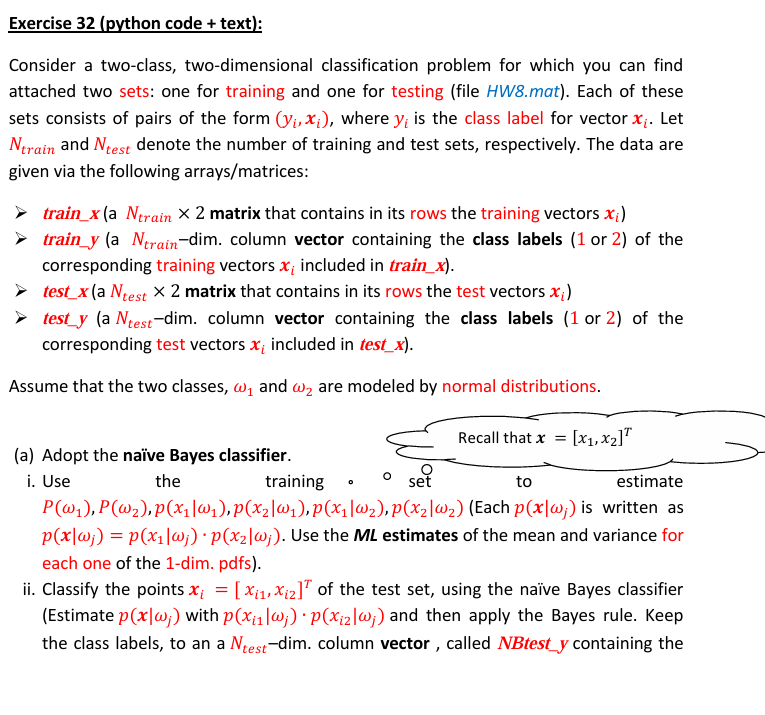
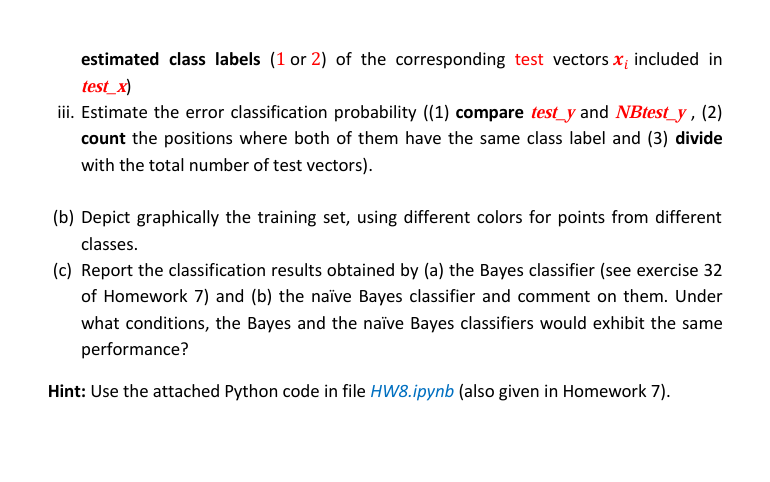


In [4]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data from the HW8.mat file
data = loadmat('HW8.mat')
train_x = data['train_x']
train_y = data['train_y'].flatten()
test_x = data['test_x']
test_y = data['test_y'].flatten()

# Separate the data by classes for training
train_x_class1 = train_x[train_y == 1]
train_x_class2 = train_x[train_y == 2]

# Number of training and test samples
N_train = train_x.shape[0]
N_test = test_x.shape[0]


(a) Naïve Bayes Classifier:

i. Estimate Class Probabilities and Conditional Densities:

In [6]:
# (i) Estimate parameters for Naïve Bayes
def estimate_naive_parameters(train_x, train_y, class_label):
    class_data = train_x[train_y == class_label]
    mu = np.mean(class_data, axis=0)
    sigma2 = np.var(class_data, axis=0)  # Variance for each feature
    return mu, sigma2

# Estimate parameters for each class
mu1_naive, sigma2_1_naive = estimate_naive_parameters(train_x, train_y, class_label=1)
mu2_naive, sigma2_2_naive = estimate_naive_parameters(train_x, train_y, class_label=2)

# Priors
P_w1_naive = np.mean(train_y == 1)
P_w2_naive = np.mean(train_y == 2)

ii. Classify Test Points Using Naïve Bayes:

In [8]:
# (ii) Classify test data using Naïve Bayes
NBtest_y = []
for x in test_x:
    # Compute likelihoods
    p_x1_w1 = norm.pdf(x[0], mu1_naive[0], np.sqrt(sigma2_1_naive[0]))
    p_x2_w1 = norm.pdf(x[1], mu1_naive[1], np.sqrt(sigma2_1_naive[1]))
    p_x_given_w1 = p_x1_w1 * p_x2_w1  # Naïve assumption: independence of features
    
    p_x1_w2 = norm.pdf(x[0], mu2_naive[0], np.sqrt(sigma2_2_naive[0]))
    p_x2_w2 = norm.pdf(x[1], mu2_naive[1], np.sqrt(sigma2_2_naive[1]))
    p_x_given_w2 = p_x1_w2 * p_x2_w2
    
    # Compute posteriors
    post_w1_naive = P_w1_naive * p_x_given_w1
    post_w2_naive = P_w2_naive * p_x_given_w2
    
    # Assign to the class with the highest posterior
    NBtest_y.append(1 if post_w1_naive > post_w2_naive else 2)

NBtest_y = np.array(NBtest_y)

iii. Estimate classification error

In [10]:
# (iii) Estimate error classification probability
correct_predictions_naive = np.sum(NBtest_y == test_y)
error_rate_naive = 1 - (correct_predictions_naive / len(test_y))

In [11]:
# Print Naïve Bayes results
print(f"Naïve Bayes Class Priors: P(w1) = {P_w1_naive:.3f}, P(w2) = {P_w2_naive:.3f}")
print(f"Naïve Bayes Means: mu1 = {mu1_naive}, mu2 = {mu2_naive}")
print(f"Naïve Bayes Variances: sigma^2_1 = {sigma2_1_naive}, sigma^2_2 = {sigma2_2_naive}")
print(f"Naïve Bayes Classification Error Rate: {error_rate_naive:.3f}")

Naïve Bayes Class Priors: P(w1) = 0.500, P(w2) = 0.500
Naïve Bayes Means: mu1 = [0.14549472 0.11840199], mu2 = [ 2.07024339 -1.89136529]
Naïve Bayes Variances: sigma^2_1 = [3.60099644 4.17836181], sigma^2_2 = [4.67059711 4.33386285]
Naïve Bayes Classification Error Rate: 0.165


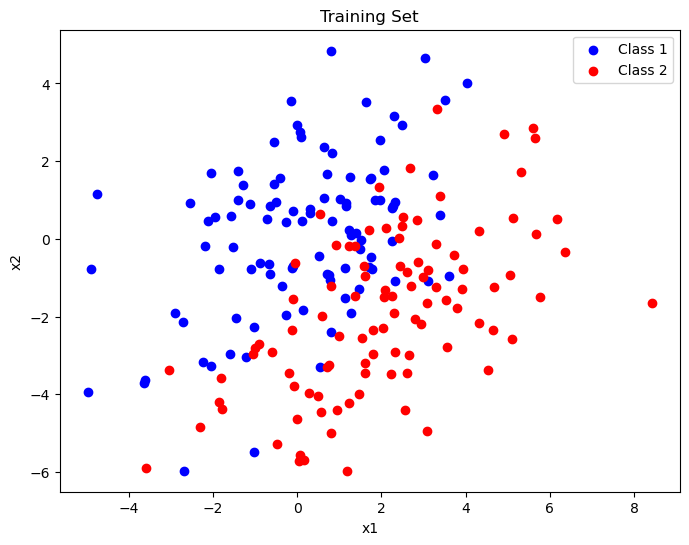

In [12]:
# (b) Plot training data
plt.figure(figsize=(8, 6))
plt.scatter(train_x[train_y == 1][:, 0], train_x[train_y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(train_x[train_y == 2][:, 0], train_x[train_y == 2][:, 1], color='red', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Set')
plt.legend()
plt.show()

In [13]:
# (c) Comparison
# Print Bayes results
print(f"Bayes Class Priors: P(w1) = {P_w1:.3f}, P(w2) = {P_w2:.3f}")
print(f"Bayes Means: mu1 = {mu1}, mu2 = {mu2}")
print(f"Bayes Covariances: sigma1 =\n{sigma1}, sigma2 =\n{sigma2}")
print(f"Bayes Classification Error Rate: {error_rate:.3f}")
print("-----------------------------------------------")
# Print Naïve Bayes results
print(f"Naïve Bayes Class Priors: P(w1) = {P_w1_naive:.3f}, P(w2) = {P_w2_naive:.3f}")
print(f"Naïve Bayes Means: mu1 = {mu1_naive}, mu2 = {mu2_naive}")
print(f"Naïve Bayes Variances: sigma^2_1 = {sigma2_1_naive}, sigma^2_2 = {sigma2_2_naive}")
print(f"Naïve Bayes Classification Error Rate: {error_rate_naive:.3f}")

Bayes Class Priors: P(w1) = 0.500, P(w2) = 0.500
Bayes Means: mu1 = [0.14549472 0.11840199], mu2 = [ 2.07024339 -1.89136529]
Bayes Covariances: sigma1 =
[[3.63737014 1.74128017]
 [1.74128017 4.22056748]], sigma2 =
[[4.71777486 2.6006903 ]
 [2.6006903  4.37763924]]
Bayes Classification Error Rate: 0.150
-----------------------------------------------
Naïve Bayes Class Priors: P(w1) = 0.500, P(w2) = 0.500
Naïve Bayes Means: mu1 = [0.14549472 0.11840199], mu2 = [ 2.07024339 -1.89136529]
Naïve Bayes Variances: sigma^2_1 = [3.60099644 4.17836181], sigma^2_2 = [4.67059711 4.33386285]
Naïve Bayes Classification Error Rate: 0.165


### Classification Results

#### Bayes Classifier:
- Class Priors: P(w1) = 0.500, P(w2) = 0.500
- Means: mu1 = [0.1455, 0.1184], mu2 = [2.0702, -1.8914]
- Covariances:
  sigma1 = [[3.6374, 1.7413], [1.7413, 4.2206]],
  sigma2 = [[4.7178, 2.6007], [2.6007, 4.3776]]
- Error Rate: 0.150

#### Naïve Bayes Classifier:
- Class Priors: P(w1) = 0.500, P(w2) = 0.500
- Means: mu1 = [0.1455, 0.1184], mu2 = [2.0702, -1.8914]
- Variances:
  sigma^2_1 = [3.6010, 4.1784],
  sigma^2_2 = [4.6706, 4.3339]
- Error Rate: 0.165

### Comments:
1. **Performance:** Bayes classifier has a lower error rate due to accounting for feature correlations.
2. **Equal Performance Conditions:** When covariance matrices are diagonal or features are independent.
3. **Implications:** 
   - Bayes: Best for correlated features and sufficient data.
   - Naïve Bayes: Simpler and effective for small datasets or when features are independent.
